K-Nearest Neighbors (KNN) on Diabetes Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [2]:
# Load Dataset
df = pd.read_csv('diabetes.csv')
print('Dataset Loaded Successfully')
print(df.head())

Dataset Loaded Successfully
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  


In [3]:
# Dataset Info
print('Dataset Info:')
print(df.info())
print('Missing Values:', df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Missing Values: Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64


In [4]:
# Split Features & Target
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print('Data Split Done')
print(f'Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}')

Data Split Done
Training samples: 614, Testing samples: 154


In [5]:
# Apply KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('KNN Model Trained Successfully')

KNN Model Trained Successfully


In [6]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:', cm)

Confusion Matrix: [[79 20]
 [28 27]]


In [7]:
# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Performance Metrics:')
print(f'Accuracy      : {accuracy*100:.2f}%')
print(f'Error Rate    : {error_rate*100:.2f}%')
print(f'Precision     : {precision*100:.2f}%')
print(f'Recall        : {recall*100:.2f}%')

Performance Metrics:
Accuracy      : 68.83%
Error Rate    : 31.17%
Precision     : 57.45%
Recall        : 49.09%


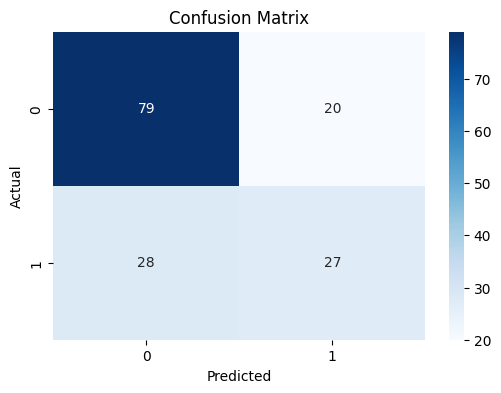

In [8]:
# Confusion Matrix Visualization
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

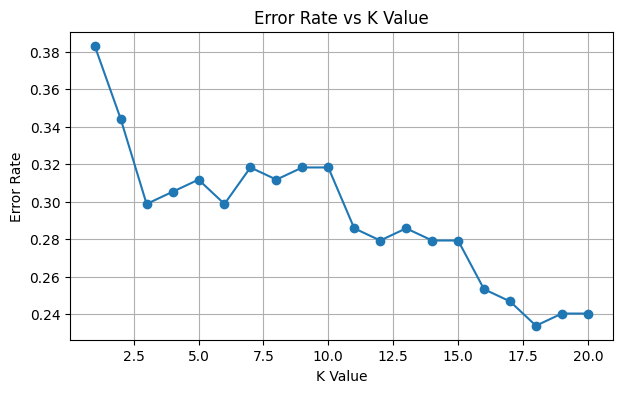

In [9]:
# Error Rate vs K Value
error_rates = []
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred_k = model.predict(X_test)
    error_rates.append(np.mean(pred_k != y_test))

plt.figure(figsize=(7,4))
plt.plot(range(1,21), error_rates, marker='o')
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()